In [22]:
# MYSQL PYTHON CONNECTION
import pandas as pd
import mysql.connector
from mysql.connector import Error
import warnings

warnings.filterwarnings("ignore")

try:
    connection = mysql.connector.connect(host='127.0.0.1',
                                         database='hospitalbilling',
                                         user='root',
                                        password='root')
    #print(connection)
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL Server version  8.0.31
You're connected to database:  ('hospitalbilling',)


In [148]:
from datetime import date

today = (date.today().strftime('%Y-%m-%d'),)
#print(today)
cursor.callproc('appointment_in_next_2days', today)
for result in cursor.stored_results():
    results=result.fetchall()

#print(results )
if len(results)>0:
    print("List of patient ids who have appointments in next 2 days")
    for result in results:
        print(result[0])
else:
    print("No appointments in next 2 days")


List of patient ids who have appointments in next 2 days
52-6890807


In [149]:
from datetime import date

today = (date.today().strftime('%Y-%m-%d'),)
#print(today)
cursor.callproc('get_vaccine', today)
for result in cursor.stored_results():
    results=result.fetchall()
    
#print(results)

if len(results)>0:
    print("List of patient ids who have to take the vaccine in next week")
    for result in results:
        print(result[0])
else:
    print("No one have to take the vaccine in next week")
    


List of patient ids who have to take the vaccine in next week
42-8242885
52-6890807
32-0949473
47-6929314
15-8394125
43-1621979
47-6929314


In [151]:
dept_name=input("Enter the depatment name for which you need the hospital list: ")
dept=(dept_name,)#'Cardiology'
cursor.callproc('get_hospital_with_department', dept)
for result in cursor.stored_results():
    hospitals=result.fetchall()
    
#print(hospitals)
print("Following are the list of hospitals which have",dept_name)
for hospital in hospitals:
    print(hospital[0])


Enter the depatment name for which you need the hospital list: Gynaecology
Following are the list of hospitals which have Gynaecology
Boston Children's Hospital
Franco-USAese Hospital
Dana-Faber Cancer Institute


In [65]:
view1="""SELECT first_name,last_name,doctor_id FROM availibility_doctor_view"""
cursor.execute(view1)
results = cursor.fetchall()
for result in results:
    print(result)

('Tanvi', 'Reddy', 'D13861')
('Regina', 'Phillips', 'D14248')
('William', 'Fishers', 'D24977')
('John', 'Rivers', 'D4219')
('Rebecca', 'Johnson', 'D43717')
('Marina', 'DSouza', 'D47306')
('Abhignya', 'Pachava', 'D58202')
('Bhavitha', 'Meka', 'D70630')
('Prakash', 'Mehta', 'D70640')
('Kaivalya', 'Avutapalli', 'D9046')


In [66]:
view2="""SELECT hosp_name, hosp_city,dept_name FROM hos_hospitaldept_view"""
cursor.execute(view2)
results = cursor.fetchall()
for result in results:
    print(result)

('Franco-USAese Hospital', 'Indianapolis', 'Paediatrics')
('Franco-USAese Hospital', 'Indianapolis', 'Obstetrics')
('Franco-USAese Hospital', 'Austin', 'Orthopaedics')
('Franco-USAese Hospital', 'Fort Lauderdale', 'Skin')
('Franco-USAese Hospital', 'Fort Lauderdale', 'Medicine')
('Franco-USAese Hospital', 'Anniston', 'Psychiatry')
('Dana-Faber Cancer Institute', 'Colorado Springs', 'Dental')
('Franco-USAese Hospital', 'Phoenix', 'Cardiology')
('Dana-Faber Cancer Institute', 'Midland', 'Neurology')
('Dana-Faber Cancer Institute', 'Philadelphia', 'Eye')
('Dana-Faber Cancer Institute', 'Van Nuys', 'Plastic Surgery')
('Dana-Faber Cancer Institute', 'Van Nuys', 'Gynaecology')
("Boston Children's Hospital", 'Roanoke', 'ENT')


In [67]:
view3="""SELECT * FROM patient_insurance_view"""
cursor.execute(view3)
results = cursor.fetchall()
for result in results:
    print(result)

('42-8242885', 'Ileane', 'Sauvain', 'Alabama', '2514640859', 'isauvainc@umn.edu', 'PL1', 'Preferred provider organization plan', 1, 0, 'KAISER', datetime.date(2022, 12, 30), 'P1002')
('15-8394125', 'Levey', 'Juanes', 'Alabama', '2057127408', 'ljuanes1@guard.com', 'PL2', 'Health maintenance organization plan', 0, 1, 'UHEALTH', datetime.date(2022, 6, 29), 'P1001')
('02-9177588', 'Wallace', 'Scawen', 'Alabama', '2055973773', 'wscawena@bus.com', 'PL3', 'Point of service plan', 1, 1, 'UHEALTH', datetime.date(2022, 12, 30), 'P1003')
('43-4350469', 'Tann', 'Colicot', 'Alabama', '2054490995', 'tcoli@princeton.edu', 'PL3', 'Point of service plan', 1, 1, 'UHEALTH', datetime.date(2022, 12, 30), 'P1003')
('75-8247992', 'Rosalyn', 'Ca', 'Alabama', '2565712491', 'rca4@twitpic.com', 'PL3', 'Point of service plan', 1, 1, 'UHEALTH', datetime.date(2022, 12, 30), 'P1003')
('36-4840031', 'Arvin', 'Lacey', 'Alabama', '2514351864', 'alacey3@wikipedia.org', 'PL3', 'Point of service plan', 1, 1, 'HUMANA', dat

In [68]:
view4="""SELECT * FROM patient_vaccine_view"""
cursor.execute(view4)
results = cursor.fetchall()
for result in results:
    print(result)

('02-9177588', 'Wallace', 'Scawen', '2055973773', 'wscawena@bus.com', '85439', datetime.date(2022, 12, 20))
('12-3268018', 'Travers', 'Morgon', '6335888665', 'tmorgon0@patch.com', '85439', datetime.date(2022, 1, 1))
('15-8394125', 'Levey', 'Juanes', '2057127408', 'ljuanes1@guard.com', '84537', datetime.date(2022, 5, 13))
('15-8394125', 'Levey', 'Juanes', '2057127408', 'ljuanes1@guard.com', '84933', datetime.date(2022, 5, 13))
('32-0949473', 'Lucias', 'Dallender', '2562271463', 'ldallender5@skype.com', '35428', datetime.date(2022, 3, 11))
('36-4840031', 'Arvin', 'Lacey', '2514351864', 'alacey3@wikipedia.org', '98714', datetime.date(2022, 8, 9))
('42-8242885', 'Ileane', 'Sauvain', '2514640859', 'isauvainc@umn.edu', '35428', datetime.date(2022, 7, 10))
('43-1621979', 'Toby', 'Skeene', '2512098336', 'tskeenee@omniture.com', '84537', datetime.date(2022, 6, 13))
('43-4350469', 'Tann', 'Colicot', '2054490995', 'tcoli@princeton.edu', '12312', datetime.date(2022, 10, 24))
('47-3781177', 'Raina'

In [69]:
view5="""SELECT * FROM patient_view"""
cursor.execute(view5)
results = cursor.fetchall()
for result in results:
    print(result)

('12-3268018', 'Travers', 'Morgon', 'Alabama', '6335888665', 'tmorgon0@patch.com', 'Type 1 Diabetes: Insulin', 'F01')
('77-4662244', 'Mano', 'Eyes', 'Alabama', '3348209156', 'meyesd@go.com', 'Blood Clots: Aspirin', 'F02')
('42-8242885', 'Ileane', 'Sauvain', 'Alabama', '2514640859', 'isauvainc@umn.edu', 'Coronary Blocks: Coronary angioplasty and stent placement', 'F03')
('56-2589714', 'Yalonda', 'Wholesworth', 'Alabama', '2514519940', 'ywholes@hatena.ne.jp', 'Bacterial pneumonia: Antibotics ', 'F04')
('15-8394125', 'Levey', 'Juanes', 'Alabama', '2057127408', 'ljuanes1@guard.com', 'Asthama:Flovent HFA and Flovent Diskus', 'F05')
('59-4900359', 'Sheffie', 'Scrowton', 'Alabama', '2519293724', 'sscrowton7@psu.edu', 'Bronchitis: Albuterol and cough medicine', 'F06')
('32-0949473', 'Lucias', 'Dallender', 'Alabama', '2562271463', 'ldallender5@skype.com', 'Throat Infection: Tylenol', 'F07')
('02-9177588', 'Wallace', 'Scawen', 'Alabama', '2055973773', 'wscawena@bus.com', 'Chest pain: Electrocard

In [70]:
view6="""SELECT * FROM vaccine_record_view"""
cursor.execute(view6)
results = cursor.fetchall()
for result in results:
    print(result)

('R1523', '85439', datetime.date(2022, 12, 20), '02-9177588', 'Cholera', Decimal('23'))
('R1265', '85439', datetime.date(2022, 1, 1), '12-3268018', 'Cholera', Decimal('23'))
('R1312', '84537', datetime.date(2022, 5, 13), '15-8394125', 'Anthrax', Decimal('2'))
('R1313', '84933', datetime.date(2022, 5, 13), '15-8394125', 'DTaP', Decimal('1'))
('R1814', '35428', datetime.date(2022, 3, 11), '32-0949473', 'Hepatitis B', Decimal('12'))
('R1436', '98714', datetime.date(2022, 8, 9), '36-4840031', 'Influenza', Decimal('4'))
('R1078', '35428', datetime.date(2022, 7, 10), '42-8242885', 'Hepatitis B', Decimal('12'))
('R1965', '84537', datetime.date(2022, 6, 13), '43-1621979', 'Anthrax', Decimal('2'))
('R1987', '12312', datetime.date(2022, 10, 24), '43-4350469', 'Meningococcal', Decimal('0'))
('R2534', '12312', datetime.date(2022, 7, 11), '47-3781177', 'Meningococcal', Decimal('0'))
('R2723', '35428', datetime.date(2022, 10, 24), '47-6929314', 'Hepatitis B', Decimal('12'))
('R2724', '84537', dateti

In [71]:
fName=input("Enter first name of the patient ") # 'Wallace'
lName=input("Enter last name of the patient ") # 'Scawen'
args=(fName,lName)
funct1="""select display_bill_amount(%s,%s)"""

cursor.execute(funct1,args)
results = cursor.fetchall()
for result in results[0]:
    print(fName,lName,"Bill amount is $",result)


Enter first name of the patient Wallace
Enter last name of the patient Scawen
Wallace Scawen Bill amount is $ 75


In [72]:
fName=input("Enter first name of the patient ") # 'Wallace'
lName=input("Enter last name of the patient ") # 'Scawen'
args=(fName,lName)
funct2="""select display_payable_amount(%s,%s)"""

cursor.execute(funct2,args)
results = cursor.fetchall()
for result in results[0]:
    print(fName,lName,"has to pay $",result)

Enter first name of the patient Wallace
Enter last name of the patient Scawen
Wallace Scawen has to pay $ 0


In [73]:
day=input("Enter date ") # '2022-10-01'
city=input("Enter city ") # 'Salt Lake City'
args=(day,city)
funct3="""select doctors_available_in_city(%s,%s)"""

cursor.execute(funct3,args)
results = cursor.fetchall()
for result in results[0]:
    if result:
        #print(result)
        print("Doctors are available on",day,"in",city)
    else:
        print("No Doctors are available on",day,"in",city)

Enter date 2022-10-01
Enter city Salt Lake City
Doctors are available on 2022-10-01 in Salt Lake City


In [74]:
cursor.execute(" drop trigger if exists after_insert_details")
trigger1 = "Create Trigger after_insert_details AFTER INSERT ON doctor FOR EACH ROW BEGIN INSERT INTO doctor_insert_details VALUES (new.doctor_id, new.first_name,   new.last_name, new.license_no, new.address_line1, new.address_line2,new.city,new.zip,new.state, CURTIME());  END "
cursor.execute(trigger1)

In [75]:
cursor.execute("drop trigger if exists before_insert_treatment ")
trigger2="Create Trigger before_insert_treatment BEFORE INSERT ON patienthistory FOR EACH ROW BEGIN IF NEW.treatement = 'Acidity' THEN SET NEW.treatement = 'Chest pain: Electrocardiogram and chest X-ray tests'; END IF;  END "
cursor.execute(trigger2)

In [76]:
cursor.execute("drop trigger if exists before_insert_treatment1")
trigger21="Create Trigger before_insert_treatment1 BEFORE INSERT ON patienthistory FOR EACH ROW BEGIN IF NEW.treatement= 'Breathlessness' Then SET NEW.treatement='Asthama:Flovent HFA and Flovent Diskus';END IF; END"
cursor.execute(trigger21)

In [77]:
cursor.execute("drop trigger if exists before_insert_treatment2")
trigger22="Create Trigger before_insert_treatment2 BEFORE INSERT ON patienthistory FOR EACH ROW BEGIN IF NEW.treatement= 'Fever that starts low and increases daily, possibly reaching as high as 104.9 F (40.5 C),Weakness' THEN SET NEW.treatement='Typhoid:Ciprofloxacin and Azithromycin';END IF; END "
cursor.execute(trigger22)

In [78]:
cursor.execute("drop trigger if exists after_update_billinginfo ")
trigger3="CREATE TRIGGER after_update_billinginfo AFTER UPDATE ON billing FOR EACH ROW BEGIN INSERT into students_log VALUES (bill_no,   CONCAT('Update bill Record ', OLD.amount, ' Previous amount :',  OLD.amount, ' Present amount ', NEW.amount));  END "
cursor.execute(trigger3)

In [79]:
cursor.execute("drop trigger if exists vaccinerecords_bd")
trigger4="CREATE TRIGGER vaccinerecords_bd BEFORE DELETE ON vaccinerecords FOR EACH ROW INSERT INTO vaccinerecords_archive (record_id,patient_id,vaccine_id,date_of_vaccination) VALUES (OLD.record_id,OLD.patient_id,OLD.vaccine_id,OLD.date_of_vaccination);"
cursor.execute(trigger4)

In [80]:
q1="""SELECT * FROM patient"""
cursor.execute(q1)
results = cursor.fetchall()
for result in results:
    print(result)

('02-9177588', '7702471980', 'Wallace', 'Scawen', '60525 Doe Crossing Junction', 'Elka', 'Tuscaloosa', '51672-1267', 'Alabama', '2055973773', 'wscawena@bus.com')
('09-9177588', '7702871980', 'William', 'Steve', '12 village circle way', 'Elka', 'Nashua', '03102', 'NewHampshire', '6037868909', 'william10@gmail.com')
('12-3268018', '9705918848', 'Travers', 'Morgon', '355 Hoard Way', 'Fallview', 'Birmingham', '76329-3011', 'Alabama', '6335888665', 'tmorgon0@patch.com')
('15-8394125', '0278519156', 'Levey', 'Juanes', '4208 Messerschmidt Junction', 'Tennessee', 'Birmingham', '61919-824', 'Alabama', '2057127408', 'ljuanes1@guard.com')
('32-0949473', '5439721134', 'Lucias', 'Dallender', '22695 Kings Hill', 'Westerfield', 'Gadsden', '60512-8034', 'Alabama', '2562271463', 'ldallender5@skype.com')
('36-4840031', '6620748767', 'Arvin', 'Lacey', '73608 Macpherson Court', 'Ilene', 'Mobile', '62011-0098', 'Alabama', '2514351864', 'alacey3@wikipedia.org')
('42-8242885', '9869902960', 'Ileane', 'Sauvai

In [81]:
q2="""delete from vaccinerecords where record_id="R1266" """
cursor.execute(q2)


In [82]:
q3="""SELECT * FROM vaccinerecords where record_id="R1266" """
cursor.execute(q3)
results=cursor.fetchall()
if len(results)>0:
    for result in results:
        print(result)
else:
    print("No record found")

No record found


In [83]:
q4="""SELECT * FROM vaccinerecords_archive"""
cursor.execute(q4)
results=cursor.fetchall()
for result in results:
    print(result)

('R1266', '12-3268018', '35428', datetime.date(2022, 1, 1))


In [178]:
# Depatments in Hospital
query=("select h.hosp_name,d.dept_name  from hospitaldepartment hd inner join hospital h on hd.hospital_id=h.hospital_id inner join departments d on hd.dept_id=d.dept_id where h.hosp_name=%s ");
t=('Franco-USAese Hospital',)
cursor.execute(query,t)
print("Departments in a hospital")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Departments in a hospital
('Franco-USAese Hospital', 'Paediatrics')
('Franco-USAese Hospital', 'Obstetrics')
('Franco-USAese Hospital', 'Orthopaedics')
('Franco-USAese Hospital', 'Skin')
('Franco-USAese Hospital', 'Medicine')
('Franco-USAese Hospital', 'Gynaecology')
('Franco-USAese Hospital', 'Psychiatry')
('Franco-USAese Hospital', 'Cardiology')
('Franco-USAese Hospital', 'Cardiology')
('Franco-USAese Hospital', 'Cardiology')


In [85]:
#Availability of doctors
query=("select d.first_name, d.last_name, a.day,a.start_time,a.end_time from doctor d join availability a on d.doctor_id=a.doctor_id");
cursor.execute(query)
print("Availability of doctors")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Availability of doctors
('Tanvi', 'Reddy', datetime.date(2022, 4, 1), datetime.timedelta(seconds=39600), datetime.timedelta(seconds=70200))
('Regina', 'Phillips', datetime.date(2022, 7, 1), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=73800))
('William', 'Fishers', datetime.date(2022, 9, 1), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=73800))
('John', 'Rivers', datetime.date(2022, 5, 1), datetime.timedelta(seconds=39600), datetime.timedelta(seconds=70200))
('Rebecca', 'Johnson', datetime.date(2022, 6, 1), datetime.timedelta(seconds=28800), datetime.timedelta(seconds=59400))
('Marina', 'DSouza', datetime.date(2022, 10, 1), datetime.timedelta(seconds=39600), datetime.timedelta(seconds=70200))
('Abhignya', 'Pachava', datetime.date(2022, 2, 1), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=73800))
('Bhavitha', 'Meka', datetime.date(2022, 3, 1), datetime.timedelta(seconds=36000), datetime.timedelta(seconds=66600))
('Prakash', 'Mehta', datet

In [177]:
# Appointments on a specific day
query=("select a.appointment_id, a.date, d.first_name, d.last_name from doctorhospital dh inner join appointments a on dh.doc_hospital_id=a.doc_hospital_id inner join doctor d on dh.doctor_id=d.doctor_id where a.date=%s ");
t=('2022-12-06',)
cursor.execute(query,t)
print("Appointments on a specific day")
myresult = cursor.fetchall()
#print(myresult)
for x in myresult:
    print(x)

Appointments on a specific day
('AP12', datetime.date(2022, 12, 6), 'Regina', 'Phillips')
('AP16', datetime.date(2022, 12, 6), 'Marina', 'DSouza')


In [172]:
# Doctor Specilaization
query=("select distinct d.first_name, d.last_name, dp.dept_name from doctorhospital dh inner join doctor d on dh.doctor_id=d.doctor_id inner join hospitaldepartment hd on hd.hos_dept_id=dh.hos_dept_id inner join departments dp on dp.dept_id=hd.dept_id");
cursor.execute(query)
print("Doctors specialization")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Doctors specialization
('Tanvi', 'Reddy', 'Gynaecology')
('Tanvi', 'Reddy', 'ENT')
('Regina', 'Phillips', 'Cardiology')
('William', 'Fishers', 'Dental')
('John', 'Rivers', 'Psychiatry')
('Rebecca', 'Johnson', 'Plastic Surgery')
('Rebecca', 'Johnson', 'Orthopaedics')
('Marina', 'DSouza', 'ENT')
('Abhignya', 'Pachava', 'ENT')
('Bhavitha', 'Meka', 'Medicine')
('Bhavitha', 'Meka', 'Eye')
('Prakash', 'Mehta', 'Medicine')
('Kaivalya', 'Avutapalli', 'Neurology')
('Kaivalya', 'Avutapalli', 'Skin')


In [166]:
# Patient and their Insurance Details
query=("select p.patient_id,p.first_name,p.last_name,co.plan_name from patient p inner join patient_policy pp on pp.patient_id=p.patient_id inner join policy po on po.policy_id=pp.policy_id inner join insuranceplan ip on po.plan_id=ip.plan_id inner join coverage co on ip.coverage_id=co.coverage_id");
cursor.execute(query)
print("Patient and their Insurance details")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Patient and their Insurance details
('42-8242885', 'Ileane', 'Sauvain', 'Preferred provider organization plan')
('15-8394125', 'Levey', 'Juanes', 'Health maintenance organization plan')
('02-9177588', 'Wallace', 'Scawen', 'Point of service plan')
('43-4350469', 'Tann', 'Colicot', 'Point of service plan')
('75-8247992', 'Rosalyn', 'Ca', 'Point of service plan')
('36-4840031', 'Arvin', 'Lacey', 'Point of service plan')
('12-3268018', 'Travers', 'Morgon', 'Exclusive provider organization Plan')
('59-4900359', 'Sheffie', 'Scrowton', 'Exclusive provider organization Plan')
('77-4662244', 'Mano', 'Eyes', 'Health savings account qualified plan')
('47-3781177', 'Raina', 'Skyram', 'Health savings account qualified plan')
('43-1621979', 'Toby', 'Skeene', 'Indemnity plan')
('32-0949473', 'Lucias', 'Dallender', 'Indemnity plan')
('81-1406074', 'Ollie', 'Weighell', 'Indemnity plan')
('72-2088963', 'Leodora', 'Lindup', 'Indemnity plan')
('56-2589714', 'Yalonda', 'Wholesworth', 'Open Access Point of 

In [167]:
# Insurance Plan Details
query=("select co.plan_name, co.health_inclusive,co.dental_inclusive,po.start_date,po.end_date from coverage co inner join insuranceplan ip on co.coverage_id=ip.coverage_id inner join policy po on po.plan_id=ip.plan_id");
cursor.execute(query)
print("Insurance plan details")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Insurance plan details
('Preferred provider organization plan', 1, 0, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Health maintenance organization plan', 0, 1, datetime.date(2022, 10, 8), datetime.date(2023, 10, 7))
('Point of service plan', 1, 1, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Point of service plan', 1, 1, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Exclusive provider organization Plan', 1, 1, datetime.date(2022, 1, 1), datetime.date(2022, 6, 30))
('Health savings account qualified plan', 0, 0, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Health savings account qualified plan', 0, 0, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Indemnity plan', 0, 1, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Indemnity plan', 0, 1, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Indemnity plan', 0, 1, datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))
('Open Access Point of service', 1, 0, dat

In [168]:
# Patient Treatment and Billing Info
query=("select p.patient_id,p.first_name,p.last_name,ph.treatement, ph.date,b.amount from patient p inner join patientdocument pd on pd.patient_id=p.patient_id inner join patienthistory ph on ph.file_id=pd.file_id inner join appointments ap on ap.appointment_id=ph.appointment_id inner join billing b on b.appointment_id=ap.appointment_id");
cursor.execute(query)
print("Patient’s treatment and billing info")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Patient’s treatment and billing info
('12-3268018', 'Travers', 'Morgon', 'Type 1 Diabetes: Insulin', None, Decimal('50.00'))
('77-4662244', 'Mano', 'Eyes', 'Blood Clots: Aspirin', None, Decimal('100.00'))
('42-8242885', 'Ileane', 'Sauvain', 'Coronary Blocks: Coronary angioplasty and stent placement', None, Decimal('35.00'))
('56-2589714', 'Yalonda', 'Wholesworth', 'Bacterial pneumonia: Antibotics ', None, Decimal('100.00'))
('15-8394125', 'Levey', 'Juanes', 'Asthama:Flovent HFA and Flovent Diskus', None, Decimal('50.00'))
('59-4900359', 'Sheffie', 'Scrowton', 'Bronchitis: Albuterol and cough medicine', None, Decimal('25.00'))
('32-0949473', 'Lucias', 'Dallender', 'Throat Infection: Tylenol', None, Decimal('250.00'))
('02-9177588', 'Wallace', 'Scawen', 'Chest pain: Electrocardiogram and chest X-ray tests', None, Decimal('75.00'))
('72-2088963', 'Leodora', 'Lindup', 'Type 2 Diabetes: Metformin', None, Decimal('100.00'))
('75-8247992', 'Rosalyn', 'Ca', 'Tuberclosis: isoniazid and rifampic

In [2]:
# Update patient Contact Details
patient_id=input("Enter patient id ") # '12-3269018'
query=("update patient set contact_no='6335888665' where patient_id=%s");
cursor.execute(query,(patient_id,))
print("Update patient contact number")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Enter patient id 12-3269018
Update patient contact number


In [11]:
# Update Doctor Address
doctor_id=input("Enter doctor id ") # 'D70630'
address_line1=input("Enter address line 1 ") # '18 country club dr'
address_line2=input("Enter address line 2 ") # 'Apt 1'
city=input("Enter Manchester ") # 'Manchester'
zipcode=int(input("Enter zip code ")) # 03210
query=("update doctor set address_line1=%s, address_line2=%s, city=%s, zip=%s where doctor_id=%s");
cursor.execute(query,(address_line1,address_line2,city,zipcode,doctor_id,))
print("Update doctor address")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

Enter doctor id D70630
Enter address line 1 18 country club dr
Enter address line 2 Apt 1
Enter Manchester Manchester
Enter zip code 03210
Update doctor address


In [28]:
# Updating Insurance policy Details
policy_id=input("Enter policy id ") # 'P1'
start_date=input("Enter start datewith ") # '2022-10-08'
end_date=input("Enter end date ") # '2023-10-07'
premium=int(input("Enter premium amount ")) # 2500
query=("UPDATE policy p INNER JOIN insuranceplan ip  ON p.plan_id = ip.plan_id INNER JOIN coverage c  ON c.coverage_id=ip.coverage_idSET p.start_date = %s, p.end_date= %s, c.premium= %s WHERE p.policy_id=%s ");
cursor.execute(query,(start_date,end_date,premium, ))
#query=("UPDATE policy p INNER JOIN insuranceplan ip  ON p.plan_id = ip.plan_id INNER JOIN coverage c  ON c.coverage_id=ip.coverage_idSET p.start_date = '2023-10-07', p.end_date= '2023-10-07', c.premium= 2500 WHERE p.policy_id='P1' ");
#cursor.execute(query)
print("Update policy details")
myresult = cursor.fetchall()
for x in myresult:
    print(x)

In [16]:
# Inserting Doctor Details
doctor_id=input("Enter doctor id ") # 'D9500'
first_name=input("Enter first name ") # 'Alex'
last_name=input("Enter last name ") # 'Parrish'
license_no=input("Enter License number ") # '2204'
address_line1=input("Enter address line 1 ") # '1993 Park Drive Apt 16'
address_line2=input("Enter address line 2 ") # 'Fenway'
city=input("Enter city ") # 'Boston'
zipcode=input("Enter zipcode ") # '02215'
state=input("Enter state ") # 'Massachusetts'
query=("Insert into doctor (doctor_id, first_name,last_name,license_no,address_line1,address_line2,city,zip,state)values (%s,%s,%s,%s,%s,%s,%s,%s,%s) ");
cursor.execute(query,(doctor_id, first_name,last_name,license_no,address_line1,address_line2,city,zipcode,state,))
print("insert doctor details")
myresult = cursor.fetchall()
# print(myresult)
for x in myresult:
    print(x)

Enter doctor id D9501
Enter first name Alex
Enter last name Parrish
Enter License number 2204
Enter address line 1 1993 Park Drive Apt 16
Enter address line 2 Fenway
Enter city Boston
Enter zipcode 02215
Enter state Massachusetts
insert doctor details
[]


In [25]:
# Inserting patient Details
patient_id=input("Enter patient id ") # '09-9177588'
first_name=input("Enter first name ") # 'William'
last_name=input("Enter last name ") # 'Steve'
email_id=input("Enter email_id ") # william10@gmail.com
contact_no=input("Enter contact number ") # '6037868909'
ssn=input("Enter ssn ") # '7702871980'
address_line1=input("Enter address line 1 ") # '12 village circle way'
address_line2=input("Enter address line 2 ") # 'Fenway'
city=input("Enter city ") # 'Boston'
zipcode=input("Enter zipcode ") # '02215'
state=input("Enter state ") # 'Massachusetts'

query=("insert into patient (patient_id, first_name, last_name, email_id, contact_no, ssn, address_line1, address_line2, city, zip, state) values (%s, %s, %s, %s , %s, %s, %s, %s, %s,%s,%s)");
cursor.execute(query,(patient_id, first_name, last_name, email_id, contact_no, ssn, address_line1, address_line2, city, zipcode, state,))
print("insert patient details")
myresult = cursor.fetchall()
# print(myresult)
for x in myresult:
    print(x)

Enter patient id 09-9167588
Enter first name William
Enter last name Steve
Enter email_id william10@gmail.com
Enter contact number 6037868909
Enter ssn 7702871980
Enter address line 1 12 village circle way
Enter address line 2 Fenway
Enter city Boston
Enter zipcode 02215
Enter state Massachusetts
insert patient details
[]


   coverage_count coverage_id
0               1         PL1
1               1         PL2
2               2         PL3
3               1         PL4
4               2         PL5
5               3         PL6
6               2         PL7
7               2         PL8
8               1         PL9


<AxesSubplot:title={'center':'Insurance Coverage Count'}, xlabel='coverage_id'>

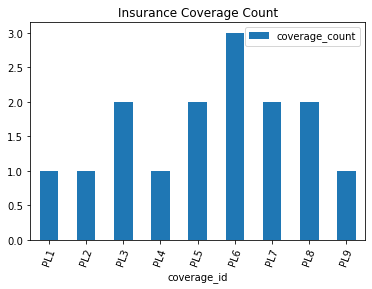

In [102]:
# Insurance plan coverage count Bar Chart
query = "select count(coverage_id) as coverage_count,coverage_id from insuranceplan group by coverage_id"
result_dataFrame = pd.read_sql(query,connection)
print(result_dataFrame)
result_dataFrame.plot.bar(x="coverage_id", y="coverage_count", rot=70, title="Insurance Coverage Count")

0    D13861
1    D14248
2    D24977
3     D4219
4    D43717
5    D47306
6    D58202
7    D70630
8    D70640
9     D9046
Name: doctor_id, dtype: object


<AxesSubplot:ylabel='appointments_count'>

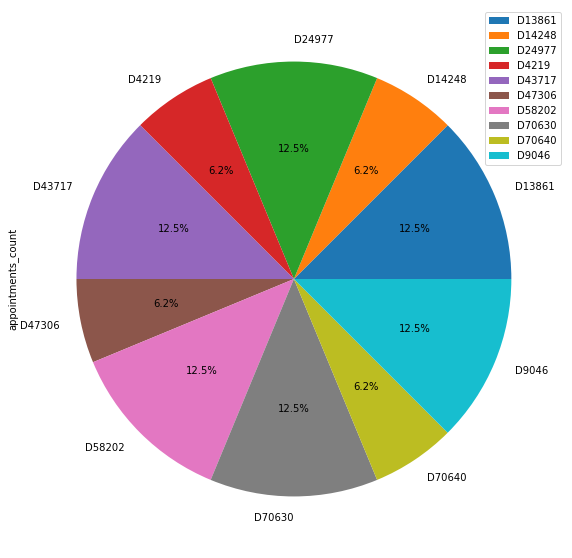

In [101]:
# Doctots appointment percentage pie Chart
query="select count(doctor_id) as appointments_count, doctor_id from doctorhospital dh inner join appointments a on dh.doc_hospital_id=a.doc_hospital_id group by doctor_id"
result_dataFrame = pd.read_sql(query,connection)
print(result_dataFrame['doctor_id'])
result_dataFrame.plot.pie(y='appointments_count',labels=result_dataFrame['doctor_id'],figsize=(10,10),autopct='%1.1f%%')

In [17]:
if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

MySQL connection is closed
